In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
#from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

#from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)

In [6]:
len(X.columns)

79

In [7]:
CB = CatBoostRegressor(verbose=False)

In [8]:
CB.fit(X_train, Y_train)

In [9]:
CB.score(X_test, Y_test)

0.9342881568490108

In [10]:
cb_results_train = CB.predict(X_train)

In [11]:
cb_results_test = CB.predict(X_test)

In [12]:
X_train_cb = X_train.assign(CB = cb_results_train)
X_train_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
80,13.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,14.0,2.0,2.0,0.0,7.0,1.0,0.0,9.0,9.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,2.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,0.0,9.0,4.0,1210,140.000000,11080,6,6,1975,1975,257.0,576.0,0.0,552.0,1128.0,1210,0,0,1.0,0.0,2,0,3,1,6,0,1975.000000,2.0,528.0,0,0,0,0,0,0,0,152529.756922
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.000000,1.0,216.0,154,0,42,86,0,0,0,122160.938260
1981,4.0,5.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,1.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,10.0,2.0,9.0,4.0,1294,60.000000,10800,4,7,1900,2000,0.0,0.0,0.0,0.0,0.0,694,600,0,0.0,0.0,2,0,3,2,7,0,1976.982048,0.0,0.0,220,114,210,0,0,0,0,104138.748775
1822,9.0,6.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,1.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1348,50.000000,6000,5,8,1925,1997,0.0,0.0,0.0,884.0,884.0,884,464,0,1.0,0.0,1,0,3,1,5,1,1960.000000,1.0,216.0,0,0,208,0,0,0,0,125223.433650
1722,10.0,5.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,8.0,8.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,3.0,2.0,5.0,5.0,2.0,3.0,0.0,1.0,8.0,3.0,9.0,4.0,2060,68.516053,8755,7,5,1999,1999,298.0,772.0,0.0,220.0,992.0,1022,1038,0,1.0,0.0,2,1,3,1,8,1,1999.000000,2.0,390.0,0,0,0,168,0,0,0,219122.590587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,990,60.000000,8072,5,5,1994,1995,0.0,746.0,0.0,244.0,990.0,990,0,0,1.0,0.0,1,0,3,1,5,0,2000.000000,2.0,480.0,0,64,0,0,0,0,0,140509.607258
1880,5.0,5.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,14.0,0.0,2.0,0.0,2.0,3.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,0.0,3.0,4.0,1.0,4.0,2.0,9.0,4.0,988,100.000000,21750,5,5,1954,1954,0.0,0.0,0.0,988.0,988.0,988,0,0,0.0,0.0,1,0,2,1,4,0,1954.000000,2.0,520.0,0,0,0,0,0,0,0,114185.280631
71,5.0,2.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,1.0,6.0,5.0,1335,75.000000,9000,7,5,2006,2007,0.0,0.0,0.0,1335.0,1335.0,1335,0,0,0.0,0.0,2,0,3,1,6,0,2007.000000,2.0,575.0,0,210,0,0,0,0,0,201399.248177
431,0.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,4.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,

In [13]:
X_test_cb = X_test.assign(CB = cb_results_test)
X_test_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
1110,6.0,6.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,11.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,2.0,9.0,4.0,1040,60.000000,7200,6,7,1925,1992,0.0,0.0,0.0,1040.0,1040.0,1040,0,0,0.0,0.0,1,0,2,1,5,0,1993.0,2.0,320.0,0,132,0,0,0,0,0,127543.172512
568,11.0,3.0,1.0,1.0,0.0,2.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,4.0,3.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,0.0,3.0,5.0,3.0,5.0,1.0,0.0,3.0,4.0,1.0,0.0,2.0,9.0,4.0,1836,68.516053,56600,5,1,1900,1950,0.0,0.0,0.0,686.0,686.0,1150,686,0,0.0,0.0,2,0,4,1,7,0,1900.0,1.0,288.0,0,0,0,0,0,0,0,125511.426384
2243,6.0,5.0,1.0,1.0,3.0,0.0,0.0,4.0,0.0,21.0,0.0,2.0,0.0,2.0,1.0,0.0,8.0,13.0,1.0,3.0,4.0,0.0,5.0,5.0,2.0,5.0,6.0,1.0,1.0,0.0,0.0,1.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,7.0,4.0,9.0,4.0,1296,67.000000,4853,5,6,1924,1999,203.0,133.0,0.0,974.0,1107.0,1296,0,0,0.0,0.0,2,0,2,1,5,1,1979.0,1.0,260.0,0,0,36,0,0,0,0,120284.264807
2341,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,0.0,5.0,0.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,0.0,2.0,9.0,4.0,1234,85.000000,11049,8,5,2007,2007,0.0,0.0,0.0,1234.0,1234.0,1234,0,0,0.0,0.0,2,0,3,1,7,0,2007.0,2.0,484.0,0,30,0,0,0,0,0,192154.280211
428,9.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,8.0,2.0,3.0,2.0,1.0,5.0,5.0,3.0,3.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1196,50.000000,6000,6,6,1940,1950,0.0,264.0,0.0,308.0,572.0,848,348,0,0.0,1.0,1,1,3,1,6,2,1973.0,2.0,576.0,0,0,0,0,0,0,0,135165.921014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,11.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,14.0,2.0,2.0,2.0,4.0,1.0,1.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,6.0,4.0,9.0,4.0,2268,50.000000,9000,8,9,1890,2002,0.0,0.0,0.0,346.0,346.0,1157,1111,0,0.0,0.0,3,0,3,1,7,0,2003.0,2.0,624.0,0,108,0,0,0,0,0,192998.496063
2463,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,3.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,0.0,4.0,1568,80.000000,9600,5,5,1967,1967,0.0,0.0,0.0,1568.0,1568.0,1568,0,0,0.0,0.0,1,1,3,1,7,0,1967.0,2.0,440.0,160,40,0,0,0,0,0,143754.427415
2067,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,2.0,5.0,3.0,1.0,6.0,1.0,2.0,1.0,4.0,2.0,6.0,1.0,1.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,2.0,2.0,9.0,4.0,1178,80.000000,10000,5,6,1973,2000,0.0,1084.0,0.0,92.0,1176.0,1178,0,0,0.0,1.0,1,1,3,1,5,1,1973.0,2.0,439.0,224,0,0,0,0,0,0,164043.984565
2392,10.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,2.0,9.0,4.0,1720,68.516053,8010

In [14]:
Y_train

80      148000
2       124900
1981    106250
1822    117000
1722    214000
         ...  
734     138000
1880    113000
71      210400
431     143000
1393    100000
Name: SalePrice, Length: 1935, dtype: int64

In [15]:
X_train_full = X_train_cb.assign(SalePrice = Y_train)
X_train_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
80,13.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,14.0,2.0,2.0,0.0,7.0,1.0,0.0,9.0,9.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,2.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,0.0,9.0,4.0,1210,140.000000,11080,6,6,1975,1975,257.0,576.0,0.0,552.0,1128.0,1210,0,0,1.0,0.0,2,0,3,1,6,0,1975.000000,2.0,528.0,0,0,0,0,0,0,0,152529.756922,148000
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.000000,1.0,216.0,154,0,42,86,0,0,0,122160.938260,124900
1981,4.0,5.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,1.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,10.0,2.0,9.0,4.0,1294,60.000000,10800,4,7,1900,2000,0.0,0.0,0.0,0.0,0.0,694,600,0,0.0,0.0,2,0,3,2,7,0,1976.982048,0.0,0.0,220,114,210,0,0,0,0,104138.748775,106250
1822,9.0,6.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,1.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1348,50.000000,6000,5,8,1925,1997,0.0,0.0,0.0,884.0,884.0,884,464,0,1.0,0.0,1,0,3,1,5,1,1960.000000,1.0,216.0,0,0,208,0,0,0,0,125223.433650,117000
1722,10.0,5.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,8.0,8.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,3.0,2.0,5.0,5.0,2.0,3.0,0.0,1.0,8.0,3.0,9.0,4.0,2060,68.516053,8755,7,5,1999,1999,298.0,772.0,0.0,220.0,992.0,1022,1038,0,1.0,0.0,2,1,3,1,8,1,1999.000000,2.0,390.0,0,0,0,168,0,0,0,219122.590587,214000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,990,60.000000,8072,5,5,1994,1995,0.0,746.0,0.0,244.0,990.0,990,0,0,1.0,0.0,1,0,3,1,5,0,2000.000000,2.0,480.0,0,64,0,0,0,0,0,140509.607258,138000
1880,5.0,5.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,14.0,0.0,2.0,0.0,2.0,3.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,0.0,3.0,4.0,1.0,4.0,2.0,9.0,4.0,988,100.000000,21750,5,5,1954,1954,0.0,0.0,0.0,988.0,988.0,988,0,0,0.0,0.0,1,0,2,1,4,0,1954.000000,2.0,520.0,0,0,0,0,0,0,0,114185.280631,113000
71,5.0,2.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,1.0,6.0,5.0,1335,75.000000,9000,7,5,2006,2007,0.0,0.0,0.0,1335.0,1335.0,1335,0,0,0.0,0.0,2,0,3,1,6,0,2007.000000,2.0,575.0,0,210,0,0,0,0,0,201399.248177,210400
431,0.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,4.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.

In [16]:
X_test_full = X_test_cb.assign(SalePrice = Y_test)
X_test_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
1110,6.0,6.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,11.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,2.0,9.0,4.0,1040,60.000000,7200,6,7,1925,1992,0.0,0.0,0.0,1040.0,1040.0,1040,0,0,0.0,0.0,1,0,2,1,5,0,1993.0,2.0,320.0,0,132,0,0,0,0,0,127543.172512,127500
568,11.0,3.0,1.0,1.0,0.0,2.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,4.0,3.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,0.0,3.0,5.0,3.0,5.0,1.0,0.0,3.0,4.0,1.0,0.0,2.0,9.0,4.0,1836,68.516053,56600,5,1,1900,1950,0.0,0.0,0.0,686.0,686.0,1150,686,0,0.0,0.0,2,0,4,1,7,0,1900.0,1.0,288.0,0,0,0,0,0,0,0,125511.426384,103000
2243,6.0,5.0,1.0,1.0,3.0,0.0,0.0,4.0,0.0,21.0,0.0,2.0,0.0,2.0,1.0,0.0,8.0,13.0,1.0,3.0,4.0,0.0,5.0,5.0,2.0,5.0,6.0,1.0,1.0,0.0,0.0,1.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,7.0,4.0,9.0,4.0,1296,67.000000,4853,5,6,1924,1999,203.0,133.0,0.0,974.0,1107.0,1296,0,0,0.0,0.0,2,0,2,1,5,1,1979.0,1.0,260.0,0,0,36,0,0,0,0,120284.264807,104000
2341,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,0.0,5.0,0.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,0.0,2.0,9.0,4.0,1234,85.000000,11049,8,5,2007,2007,0.0,0.0,0.0,1234.0,1234.0,1234,0,0,0.0,0.0,2,0,3,1,7,0,2007.0,2.0,484.0,0,30,0,0,0,0,0,192154.280211,179900
428,9.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,8.0,2.0,3.0,2.0,1.0,5.0,5.0,3.0,3.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1196,50.000000,6000,6,6,1940,1950,0.0,264.0,0.0,308.0,572.0,848,348,0,0.0,1.0,1,1,3,1,6,2,1973.0,2.0,576.0,0,0,0,0,0,0,0,135165.921014,128000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,11.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,14.0,2.0,2.0,2.0,4.0,1.0,1.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,6.0,4.0,9.0,4.0,2268,50.000000,9000,8,9,1890,2002,0.0,0.0,0.0,346.0,346.0,1157,1111,0,0.0,0.0,3,0,3,1,7,0,2003.0,2.0,624.0,0,108,0,0,0,0,0,192998.496063,240000
2463,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,3.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,0.0,4.0,1568,80.000000,9600,5,5,1967,1967,0.0,0.0,0.0,1568.0,1568.0,1568,0,0,0.0,0.0,1,1,3,1,7,0,1967.0,2.0,440.0,160,40,0,0,0,0,0,143754.427415,143000
2067,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,2.0,5.0,3.0,1.0,6.0,1.0,2.0,1.0,4.0,2.0,6.0,1.0,1.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,2.0,2.0,9.0,4.0,1178,80.000000,10000,5,6,1973,2000,0.0,1084.0,0.0,92.0,1176.0,1178,0,0,0.0,1.0,1,1,3,1,5,1,1973.0,2.0,439.0,224,0,0,0,0,0,0,164043.984565,157000
2392,10.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2

In [17]:
combo = pd.concat([X_train_full, X_test_full], axis=0)
combo

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
80,13.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,14.0,2.0,2.0,0.0,7.0,1.0,0.0,9.0,9.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,2.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,0.0,9.0,4.0,1210,140.000000,11080,6,6,1975,1975,257.0,576.0,0.0,552.0,1128.0,1210,0,0,1.0,0.0,2,0,3,1,6,0,1975.000000,2.0,528.0,0,0,0,0,0,0,0,152529.756922,148000
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.000000,1.0,216.0,154,0,42,86,0,0,0,122160.938260,124900
1981,4.0,5.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,1.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,10.0,2.0,9.0,4.0,1294,60.000000,10800,4,7,1900,2000,0.0,0.0,0.0,0.0,0.0,694,600,0,0.0,0.0,2,0,3,2,7,0,1976.982048,0.0,0.0,220,114,210,0,0,0,0,104138.748775,106250
1822,9.0,6.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,1.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1348,50.000000,6000,5,8,1925,1997,0.0,0.0,0.0,884.0,884.0,884,464,0,1.0,0.0,1,0,3,1,5,1,1960.000000,1.0,216.0,0,0,208,0,0,0,0,125223.433650,117000
1722,10.0,5.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,8.0,8.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,3.0,2.0,5.0,5.0,2.0,3.0,0.0,1.0,8.0,3.0,9.0,4.0,2060,68.516053,8755,7,5,1999,1999,298.0,772.0,0.0,220.0,992.0,1022,1038,0,1.0,0.0,2,1,3,1,8,1,1999.000000,2.0,390.0,0,0,0,168,0,0,0,219122.590587,214000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,11.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,14.0,2.0,2.0,2.0,4.0,1.0,1.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,6.0,4.0,9.0,4.0,2268,50.000000,9000,8,9,1890,2002,0.0,0.0,0.0,346.0,346.0,1157,1111,0,0.0,0.0,3,0,3,1,7,0,2003.000000,2.0,624.0,0,108,0,0,0,0,0,192998.496063,240000
2463,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,3.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,0.0,4.0,1568,80.000000,9600,5,5,1967,1967,0.0,0.0,0.0,1568.0,1568.0,1568,0,0,0.0,0.0,1,1,3,1,7,0,1967.000000,2.0,440.0,160,40,0,0,0,0,0,143754.427415,143000
2067,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,2.0,5.0,3.0,1.0,6.0,1.0,2.0,1.0,4.0,2.0,6.0,1.0,1.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,2.0,2.0,9.0,4.0,1178,80.000000,10000,5,6,1973,2000,0.0,1084.0,0.0,92.0,1176.0,1178,0,0,0.0,1.0,1,1,3,1,5,1,1973.000000,2.0,439.0,224,0,0,0,0,0,0,164043.984565,157000
2392,10.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.

In [18]:
X_gb = combo.drop(['SalePrice'], axis=1)
y_gb = combo.SalePrice

In [19]:
gbm = GradientBoostingRegressor()

In [20]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error',
          }

In [21]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [22]:
dfs = evaluate_model(gbm, X_gb, y_gb)

In [23]:
gb_df = dfs[['test_r2', 'test_neg_mae']]
gb_df = gb_df.assign(MAE = gb_df['test_neg_mae'].abs())
gb_df = gb_df.rename(columns = {'test_r2':'CB+GB R2', 'MAE':'CB+GB MAE'})
gb_df

,CB+GB R2,test_neg_mae,CB+GB MAE
0,0.978613,-6943.415938,6943.415938
1,0.981687,-6771.942928,6771.942928
2,0.981921,-6858.337702,6858.337702
3,0.970616,-7417.518013,7417.518013
4,0.969466,-7241.443460,7241.443460
5,0.978124,-6978.206792,6978.206792
6,0.984724,-6463.900778,6463.900778
7,0.978375,-7028.627436,7028.627436
8,0.966256,-7564.232366,7564.232366
9,0.976047,-6996.445831,6996.445831


In [24]:
gb_df.to_csv('CB+GB.csv', index=False)

In [25]:
gb_df.describe()

,CB+GB R2,test_neg_mae,CB+GB MAE
count,15.000000,15.000000,15.000000
mean,0.976948,-6997.918060,6997.918060
std,0.006050,430.199024,430.199024
min,0.966256,-8066.901018,6461.267393
25%,0.973310,-7135.035448,6733.333824
50%,0.978262,-6943.415938,6943.415938
75%,0.981804,-6733.333824,7135.035448
max,0.984724,-6461.267393,8066.901018


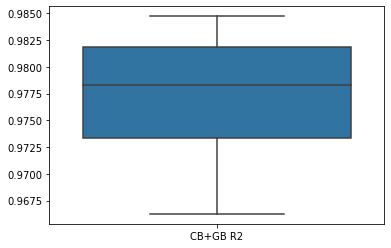

In [26]:
sns.boxplot(data=gb_df[['CB+GB R2']]);

In [27]:
X_trainGB, X_testGB, Y_trainGB, Y_testGB = train_test_split(X_gb,y_gb,test_size=0.25)
    
gbm.fit(X_trainGB, Y_trainGB)
y_pred = gbm.predict(X_testGB)

GB_Score = r2_score(Y_testGB, y_pred)
GB_Score

0.9848484653331975

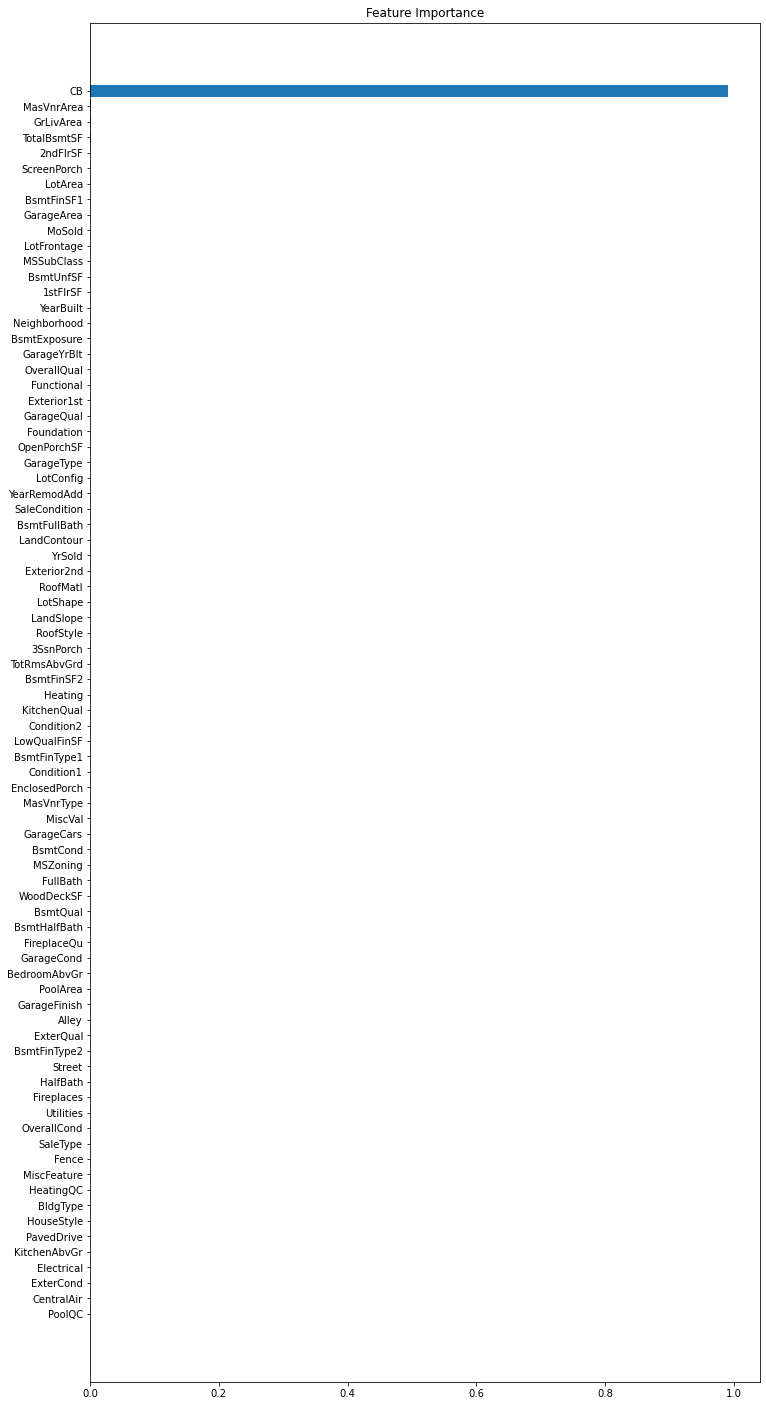

In [28]:
feature_importance = gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 25))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_testGB.columns)[sorted_idx])
plt.title('Feature Importance');

In [29]:
X_cols = combo.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('CB', 0.9900649545793239),
 ('MasVnrArea', 0.0020189591402296433),
 ('GrLivArea', 0.0014359523410484424),
 ('TotalBsmtSF', 0.0011584293408924992),
 ('2ndFlrSF', 0.0008211597982308372),
 ('ScreenPorch', 0.0007404434634946628),
 ('LotArea', 0.00046382590404971173),
 ('BsmtFinSF1', 0.0004607835240768985),
 ('GarageArea', 0.00042814115671246244),
 ('MoSold', 0.0002984468422592086),
 ('LotFrontage', 0.00022350088497697423),
 ('MSSubClass', 0.0001695443658460041),
 ('BsmtUnfSF', 0.00014947300762440806),
 ('1stFlrSF', 0.00012621462059905818),
 ('YearBuilt', 0.00011905852645766044),
 ('Neighborhood', 0.00011893811567669837),
 ('BsmtExposure', 0.00011056744385059132),
 ('GarageYrBlt', 8.585982061709841e-05),
 ('OverallQual', 7.970607730393455e-05),
 ('Functional', 7.962218494254282e-05),
 ('Exterior1st', 7.282897229299253e-05),
 ('GarageQual', 7.083973078532844e-05),
 ('Foundation', 6.942819097230144e-05),
 ('OpenPorchSF', 6.368777488530004e-05),
 ('GarageType', 5.6044563270144856e-05),
 ('Lo

In [30]:
gbm.predict(X_gb)

array([153111.10602086, 122448.59555177, 107878.31573764, ...,
       162755.84318549, 192869.8661384 , 251506.41939587])